# HOMELESSNESS IN SCOTLAND: 2018-19
 The PDF with original graphs /data can be found in the same folder as this notebook or via the following link: https://www.gov.scot/binaries/content/documents/govscot/publications/statistics/2019/06/homelessness-scotland-2018-2019/documents/homelessness-scotland-2018-19/homelessness-scotland-2018-19/govscot%3Adocument/homelessness-scotland-2018-19.pdf 

There are 2  datasets  about homelessness in Scotland however only some tabs within each dataset relate to disabilities. This is refelcted in the transformations and therefore what data is avilable on pmd. 
-  Dataset 1: Charts - Data 6 and Data 9
- Dataset 2: Tables - 9, 10 &15 

----------------------------------------------------------------------------------------------------------------------

# Charts

----------------------------------------------------------------------------------------------------------------------

# Chart 6 (Data 6)
Is a bar chart comparing the number of applications for each reason accross 2017/2018 and 2018/2019. 
Below is a screenshot of the bar chart taken from the pdf from the link above. 

#### Original Chart 6 (For comparision reasons)
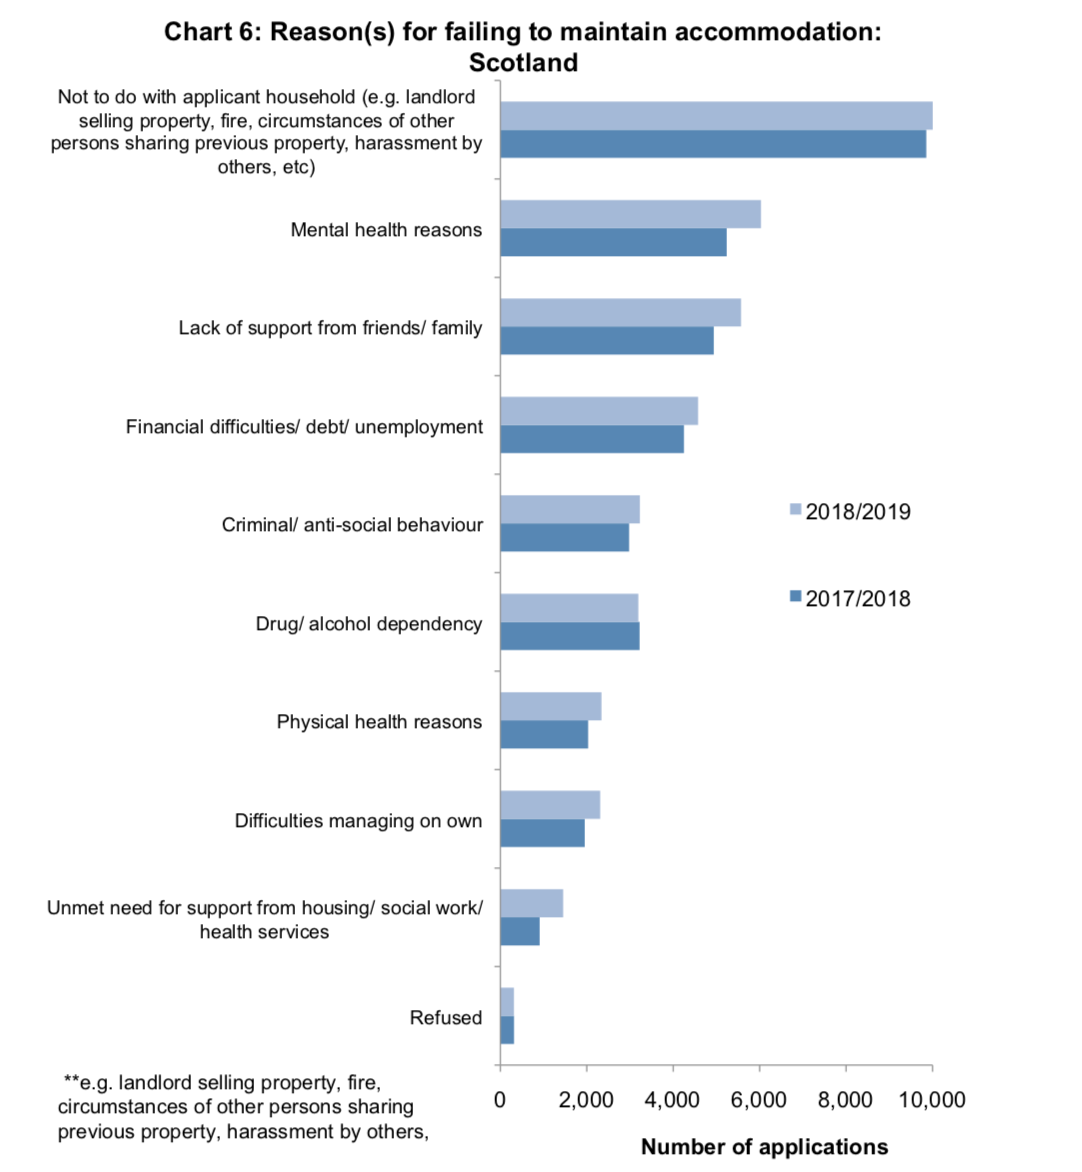  

## Filtering PMD 
(Link to data for Chart 6) 
http://gss-data.org.uk/dataset?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-reason-for-failing-to-maintain-accommodation

In order to retrieve the data required to reproduce the above bar chart the following filters will need to be applied. I have made a note inside brackets beside any where the wording has been adapted or changed during the transformation processes form the original and reasons/possible reasons why. 

###### Reference Period :  (date format has been changed on both enteries to match standards)
- 2018-03-31 P1Y 
- 2019-03-31 P1Y 

##### Reasons for failing to maintain accommodation: (Thoses with 'adapted' beside have been changed, and the original wording can be found below the heading 'Adapted vs original'  if no explination given inside brackets)
- Not to do with applicant household (adapted 1)
- Mental health reasons
- Lack of support from friends or family (adapted, brackets replaced with 'or')
- Financial difficulties or debt or unemployment (adapted, brackets replaced with 'or')
- Criminal or anti-social behaviour (adapted, brackets replaced with 'or')
- Drug or alcohol dependency (adapted, brackets replaced with 'or')
- Physical health reasons
- Difficulties managing on own
- Unmet need for support from housing or social work or health services (adapted, brackets replaced with 'or')
- Refused


### Adapted vs original
##### adapted 1:  Not to do with applicant household
- original: Not to do with applicant household (e.g. landlord selling property, fire, circumstances of other persons sharing previous property, harassment by others, etc)
- I assume the main reason the output was shorted to 'Not to do with applicant household' is due to the original being long. My only concern is loss of understanding. 

## Pulling in the data from the filter  
Once the filter has been applied the csv can be downlaoded by a user or in this case 'copy linked address' by right clicking on the 'Download CSV (Tidy Data)' button and click on 'Copy linked address' as shown below. The linked address can now be stored to begin the cleaning and visualisation process. 

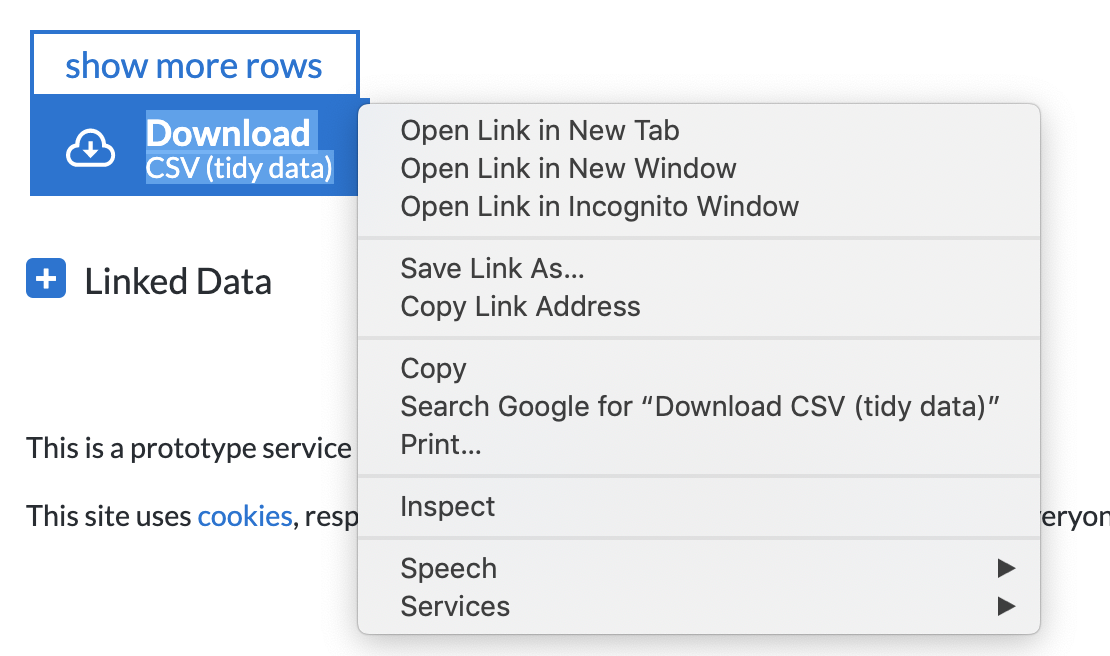


In [1]:
#Imports needed
from gssutils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#The linked address of the CSV for the filtered data is held in 'chart_6_filter' as seen below. 
chart_6_filter = 'http://gss-data.org.uk/dataset/download?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-reason-for-failing-to-maintain-accommodation&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Fcriminal-or-anti-social-behaviour&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Fdifficulties-managing-on-own&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Fdrug-or-alcohol-dependency&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Ffinancial-difficulties-or-debt-or-unemployment&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Flack-of-support-from-friends-or-family&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Fmental-health-reasons&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Fnot-to-do-with-applicant-household&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Fphysical-health-reasons&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Frefused&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-failing-to-maintain-accommodation%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-failing-to-maintain-accommodation%252Funmet-need-for-support-from-housing-or-social-work-or-health-services&filter-facet=http%253A%252F%252Fpurl.org%252Flinked-data%252Fsdmx%252F2009%252Fdimension%2523refPeriod%2Chttp%253A%252F%252Freference.data.gov.uk%252Fid%252Fgregorian-interval%252F2018-03-31T00%253A00%253A00%252FP1Y&filter-facet=http%253A%252F%252Fpurl.org%252Flinked-data%252Fsdmx%252F2009%252Fdimension%2523refPeriod%2Chttp%253A%252F%252Freference.data.gov.uk%252Fid%252Fgregorian-interval%252F2019-03-31T00%253A00%253A00%252FP1Y'

In [2]:
#then pandas read_csv function is used to read a csv file and convert to pandas dataframe.
chart_6_data = pd.read_csv(chart_6_filter)

In [3]:
#the filtered data is now in a pandas datafram and can easily be cleaned / visualised. 
chart_6_data = chart_6_data.sort_values(by='Value', ascending=False)
chart_6_data

,Reasons for failing to maintain accommodation,Reference Period,measure type,Value,Unit of Measure
13,Not to do with applicant household,2019-03-31 P1Y,Count,10661.0,People
12,Not to do with applicant household,2018-03-31 P1Y,Count,9856.0,People
11,Mental health reasons,2019-03-31 P1Y,Count,6031.0,People
9,Lack of support from friends or family,2019-03-31 P1Y,Count,5570.0,People
10,Mental health reasons,2018-03-31 P1Y,Count,5238.0,People
8,Lack of support from friends or family,2018-03-31 P1Y,Count,4939.0,People
7,Financial difficulties or debt or unemployment,2019-03-31 P1Y,Count,4576.0,People
6,Financial difficulties or debt or unemployment,2018-03-31 P1Y,Count,4249.0,People
1,Criminal or anti-social behaviour,2019-03-31 P1Y,Count,3229.0,People
4,Drug or alcohol dependency,2018-03-31 P1Y,Count,3222.0,People


In [4]:
# checking the data type of each column. 
chart_6_data.dtypes

Reasons for failing to maintain accommodation     object
Reference Period                                  object
measure type                                      object
Value                                            float64
Unit of Measure                                   object
dtype: object

## Re-arranging the data 
next step is to select a particular Series group from the original DataFrame group by referencing the two column name required. ('Reasons for failing to maintain accommodation' and 'Reference Period')

In [5]:
group_data = chart_6_data.groupby(['Reasons for failing to maintain accommodation', 'Reference Period'])                                                                                                      

As with the GroupBy object, no computation is done until we call some aggregate on the object. This gives an idea of the general scale of values for each 'Reasons for failing to maintain accommodation' within a given 'Reference Period'
(note .unstack() function in pandas converts the data into unstacked format) 

In [6]:
print (group_data['Value'].aggregate(np.sum).unstack())

Reference Period                                    2018-03-31 P1Y  \
Reasons for failing to maintain accommodation                        
Criminal or anti-social behaviour                           2980.0   
Difficulties managing on own                                1953.0   
Drug or alcohol dependency                                  3222.0   
Financial difficulties or debt or unemployment              4249.0   
Lack of support from friends or family                      4939.0   
Mental health reasons                                       5238.0   
Not to do with applicant household                          9856.0   
Physical health reasons                                     2032.0   
Refused                                                      317.0   
Unmet need for support from housing or social w...           910.0   

Reference Period                                    2019-03-31 P1Y  
Reasons for failing to maintain accommodation                       
Criminal or anti-soci

In [7]:
#Storing the groupby object based on its 'Value' and using the numpy 'np.sum' function to return the sum (Value)
result = group_data['Value'].aggregate(np.sum).unstack()

Now the data is in the shape required the bar chart can be plotted using the .plot function. The kind = 'barh' meaning it will be displayed in a horrizontal format. 

## Visualising the data

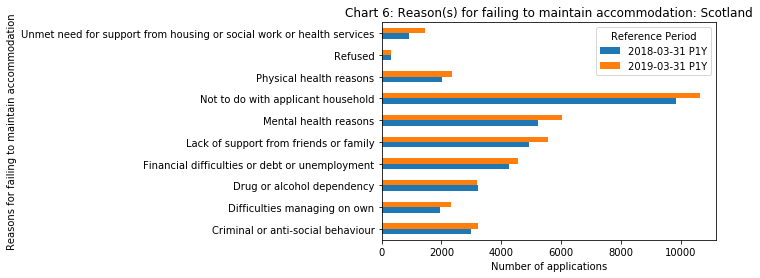

In [8]:
result.plot(kind='barh', title ='Chart 6: Reason(s) for failing to maintain accommodation: Scotland')
plt.xlabel('Number of applications')
plt.show()

----------------------------------------------------------------------------------------------------------------------

# Chart 9 (Data 9)
Is a bar chart compares the Number of applications with an identified support need against the Support needed over the year 2018-19. 

#### Original Chart 9 (For comparision reasons)
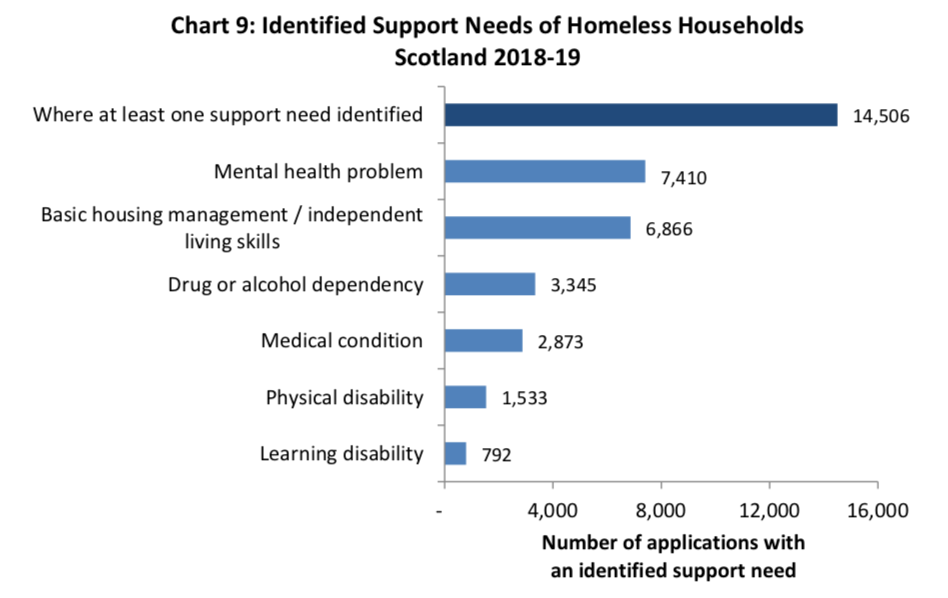
 

## Filtering PMD 
(Link to data for Chart 9) 
http://gss-data.org.uk/dataset?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-identified-support-needs-of-homeless-households

In order to retrieve the data required to reproduce the above bar chart the following filters will need to be applied. I have made a note inside brackets beside any where the wording has been adapted or changed during the transformation processes form the original and reasons/possible reasons why. 

###### Reference Period :  (date format has been changed to match standards)
- 2019-03-31 P1Y 

##### Identified support needs of homeless households: (Thoses with 'adapted' beside have been changed, and the original wording can be found below the heading 'Adapted vs original'  if no explination given inside brackets)
- Where at least one support need identified 
- Physical disability
- Mental health problem
- Medical condition
- Learning disability
- Drug or alcohol dependency
- Basic housing management or independent living skills

### Adapted vs original
N/A 

## Pulling in the data from the filter  
The same process applies as shown above for Chart 6. 
" Once the filter has been applied the csv can be downlaoded by a user or in this case 'copy linked address' by right clicking on the 'Download CSV (Tidy Data)' button and click on 'Copy linked address' as shown below. The linked address can now be stored to begin the cleaning and visualisation process.  "

In [9]:
#The linked address of the CSV for the filtered data is held in 'chart_9_filter' as seen below. 
chart_9_filter = 'http://gss-data.org.uk/dataset/download?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-identified-support-needs-of-homeless-households&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Fidentified-support-needs-of-homeless-households%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Fidentified-support-needs-of-homeless-households%252Flearning-disability&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Fidentified-support-needs-of-homeless-households%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Fidentified-support-needs-of-homeless-households%252Fphysical-disability&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Fidentified-support-needs-of-homeless-households%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Fidentified-support-needs-of-homeless-households%252Fmedical-condition&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Fidentified-support-needs-of-homeless-households%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Fidentified-support-needs-of-homeless-households%252Fdrug-or-alcohol-dependency&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Fidentified-support-needs-of-homeless-households%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Fidentified-support-needs-of-homeless-households%252Fbasic-housing-management-or-independent-living-skills&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Fidentified-support-needs-of-homeless-households%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Fidentified-support-needs-of-homeless-households%252Fmental-health-problem&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Fidentified-support-needs-of-homeless-households%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Fidentified-support-needs-of-homeless-households%252Fwhere-at-least-one-support-need-identified&filter-facet=http%253A%252F%252Fpurl.org%252Flinked-data%252Fsdmx%252F2009%252Fdimension%2523refPeriod%2Chttp%253A%252F%252Freference.data.gov.uk%252Fid%252Fgregorian-interval%252F2019-03-31T00%253A00%253A00%252FP1Y'
#then pandas read_csv function is used to read a csv file and convert to pandas dataframe.
chart_9_data = pd.read_csv(chart_9_filter)
chart_9_data

,Identified support needs of homeless households,measure type,Reference Period,Value,Unit of Measure
0,Basic housing management or independent living...,Count,2019-03-31 P1Y,6866.0,People
1,Drug or alcohol dependency,Count,2019-03-31 P1Y,3345.0,People
2,Learning disability,Count,2019-03-31 P1Y,792.0,People
3,Medical condition,Count,2019-03-31 P1Y,2873.0,People
4,Mental health problem,Count,2019-03-31 P1Y,7410.0,People
5,Physical disability,Count,2019-03-31 P1Y,1533.0,People
6,Where at least one support need identified,Count,2019-03-31 P1Y,14506.0,People


## Re-arranging the data 

In [10]:
#The dataset is very small and needs very little cleaning. Only re-arranging required is to drop columns not needed in the plot. 
chart_9_data = chart_9_data.drop(['measure type', 'Reference Period', 'Unit of Measure'], axis=1)
chart_9_data

,Identified support needs of homeless households,Value
0,Basic housing management or independent living...,6866.0
1,Drug or alcohol dependency,3345.0
2,Learning disability,792.0
3,Medical condition,2873.0
4,Mental health problem,7410.0
5,Physical disability,1533.0
6,Where at least one support need identified,14506.0


## Visualising the data

Text(0.5, 0, 'Number of applications with an identified support need')

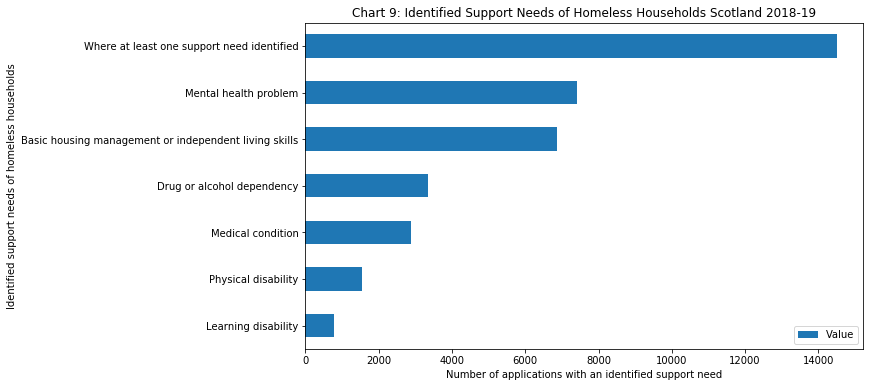

In [11]:
#sorting the values in descending order 
chart_9_data.sort_values('Value',inplace=True)
#plotting the horizontal bar chart 
chart_9_data.plot(kind='barh',y='Value',x='Identified support needs of homeless households', title="Chart 9: Identified Support Needs of Homeless Households Scotland 2018-19", figsize=(10,6))
#setting the x axis label 
plt.xlabel('Number of applications with an identified support need')

----------------------------------------------------------------------------------------------------------------------

# Tables

----------------------------------------------------------------------------------------------------------------------

# Chart 5 (Table 9)

#### Original Chart 5 (For comparision reasons)
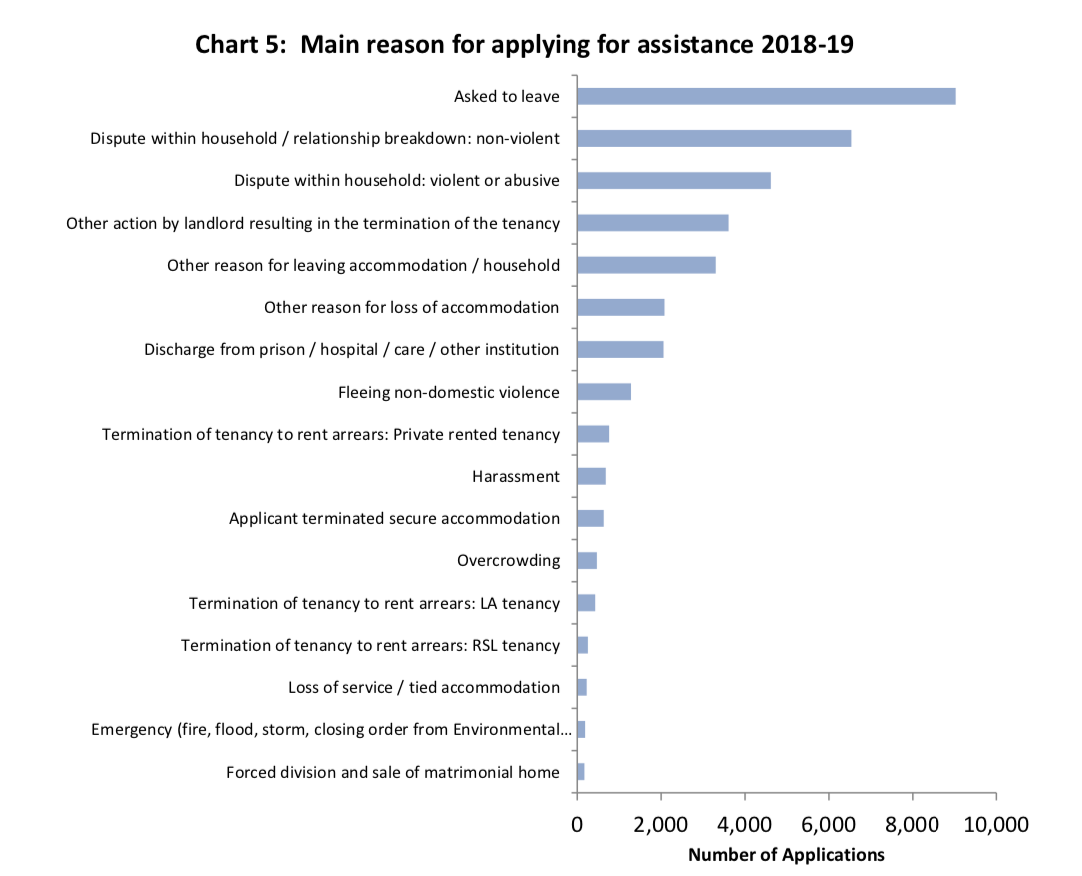



## Filtering PMD 
(Link to data for Chart 5) 
http://gss-data.org.uk/dataset?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-applications-main-reason-for-making-an-application-for-homelenessness-to-a-local-authority

In order to retrieve the data required to reproduce the above bar chart the following filters will need to be applied. I have made a note inside brackets beside any where the wording has been adapted or changed during the transformation processes form the original and reasons/possible reasons why. 

###### Reference Period :  (date format has been changed to match standards)
- 2019-03-31 P1Y 

##### Reasons for homelessness application: (Thoses with 'adapted' beside have been changed, and the original wording can be found below the heading 'Adapted vs original'  if no explination given inside brackets)
- Applicant terminated secure accommodation
- Asked to leave
- Discharge from prison or hospital or care or other institution
- Dispute within household or relationship breakdown: non-violent
- Dispute within household: violent or abusive
- Emergency fire flood storm closing order from Environmental Health etc.
- Fleeing non-domestic violence
- Forced division and sale of matrimonial home
- Harassment
- Loss of service or tied accommodation
- Other action by landlord resulting in the termination of the tenancy
- Other reason for leaving accommodation or household
- Other reason for loss of accommodation
- Overcrowding
- Termination of tenancy to rent arrears: LA tenancy
- Termination of tenancy to rent arrears: Private rented tenancy
- Termination of tenancy to rent arrears: RSL tenancy

### Adapted vs original
N/A 

## Pulling in the data from the filter  
The same process applies as shown above for Chart 6 and chart 9. 

In [12]:
#The linked address of the CSV for the filtered data is held in 'chart_9_filter' as seen below. 
table_9_filter = 'http://gss-data.org.uk/dataset/download?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-applications-main-reason-for-making-an-application-for-homelenessness-to-a-local-authority&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fapplicant-terminated-secure-accommodation&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fasked-to-leave&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fdischarge-from-prison-or-hospital-or-care-or-other-institution&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fdispute-within-household-or-relationship-breakdown-non-violent&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fdispute-within-household-violent-or-abusive&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Femergency-fire-flood-storm-closing-order-from-environmental-health-etc&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Ffleeing-non-domestic-violence&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fforced-division-and-sale-of-matrimonial-home&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fharassment&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Floss-of-service-or-tied-accommodation&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fother-action-by-landlord-resulting-in-the-termination-of-the-tenancy&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fother-reason-for-leaving-accommodation-or-household&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fother-reason-for-loss-of-accommodation&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Fovercrowding&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Ftermination-of-tenancy-to-rent-arrears-la-tenancy&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Ftermination-of-tenancy-to-rent-arrears-private-rented-tenancy&filter-facet=http%253A%252F%252Fgss-data.org.uk%252Fdef%252Fdimension%252Freasons-for-homelessness-application%2Chttp%253A%252F%252Fgss-data.org.uk%252Fdef%252Fconcept%252Freasons-for-homelessness-application%252Ftermination-of-tenancy-to-rent-arrears-rsl-tenancy&filter-facet=http%253A%252F%252Fpurl.org%252Flinked-data%252Fsdmx%252F2009%252Fdimension%2523refPeriod%2Chttp%253A%252F%252Freference.data.gov.uk%252Fid%252Fgregorian-interval%252F2019-03-31T00%253A00%253A00%252FP1Y'
#then pandas read_csv function is used to read a csv file and convert to pandas dataframe.
table_9_data = pd.read_csv(table_9_filter)
table_9_data

,Reasons for homelessness application,Reference Period,measure type,Value,Unit of Measure
0,Applicant terminated secure accommodation,2019-03-31 P1Y,Count,631.0,People
1,Asked to leave,2019-03-31 P1Y,Count,9030.0,People
2,Discharge from prison or hospital or care or o...,2019-03-31 P1Y,Count,2056.0,People
3,Dispute within household or relationship break...,2019-03-31 P1Y,Count,6534.0,People
4,Dispute within household: violent or abusive,2019-03-31 P1Y,Count,4614.0,People
5,Emergency fire flood storm closing order from ...,2019-03-31 P1Y,Count,189.0,People
6,Fleeing non-domestic violence,2019-03-31 P1Y,Count,1281.0,People
7,Forced division and sale of matrimonial home,2019-03-31 P1Y,Count,171.0,People
8,Harassment,2019-03-31 P1Y,Count,679.0,People
9,Loss of service or tied accommodation,2019-03-31 P1Y,Count,225.0,People


## Re-arranging the data 

In [13]:
#The dataset is very small and needs very little cleaning. Only re-arranging required is to drop columns not needed in the plot. 
table_9_data = table_9_data.drop(['measure type', 'Reference Period', 'Unit of Measure'], axis=1)
table_9_data

,Reasons for homelessness application,Value
0,Applicant terminated secure accommodation,631.0
1,Asked to leave,9030.0
2,Discharge from prison or hospital or care or o...,2056.0
3,Dispute within household or relationship break...,6534.0
4,Dispute within household: violent or abusive,4614.0
5,Emergency fire flood storm closing order from ...,189.0
6,Fleeing non-domestic violence,1281.0
7,Forced division and sale of matrimonial home,171.0
8,Harassment,679.0
9,Loss of service or tied accommodation,225.0


## Visualising the data

Text(0.5, 0, 'Number of Applications')

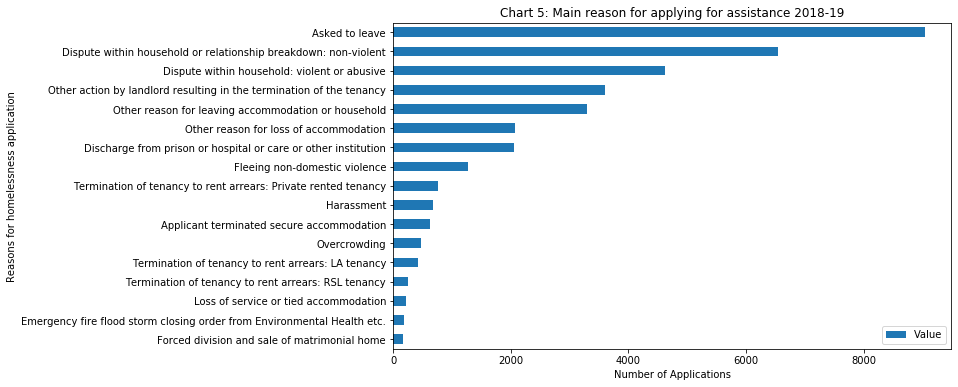

In [14]:
#sorting the values in descending order 
table_9_data.sort_values('Value',inplace=True)
#plotting the horizontal bar chart 
table_9_data.plot(kind='barh',y='Value',x='Reasons for homelessness application', title="Chart 5: Main reason for applying for assistance 2018-19", figsize=(10,6))
#setting the x axis label 
plt.xlabel('Number of Applications')

----------------------------------------------------------------------------------------------------------------------

# Chart ? (Table 10) 
http://gss-data.org.uk/dataset?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-applications-reasons-for-failing-to-maintain-accommodation-prior-to-application

# Chart ? (Table 15)
http://gss-data.org.uk/dataset?uri=http%3A%2F%2Fgss-data.org.uk%2Fdata%2Fgss_data%2Fdisability%2Fsg-homelessness-in-scotland-annual-publication%2Fhomelessness-in-scotland-applications-support-need-identified-for-those-homeless-or-threatened-with-homelessness-households